## Ejercicio: Visualizando contadores de bicicletas de Seattle

Vamos a hacer un ejercicio con datos de series temporales del mundo real, en concreto, echemos un vistazo a los recuentos de bicicletas en un puente de Seattle: [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).

Estos datos provienen de un contador de bicicletas automatizado, instalado a fines de 2012, que tiene sensores inductivos en las aceras este y oeste del puente.
Los recuentos de bicicletas por hora se pueden descargar de http://data.seattle.gov/; o directamente a través de [este link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

Para ahorrarnos tiempo, ya tienes el fichero descargado en esta carpeta bajo el nombre de "Fremont_Bridge_Bicycle_Counter.csv".

Si leemos el dataset sin especificar nada más, Pandas interpretará la columna temporal como un string. Sin embargo, si hacemos la conversión a Datetime tras la lectura, podremos utilizarlo como dato temporal.

Así que lee el csv y convierte la columna "Date" en algo temporal. Después comprueba que lo has convertido bien analizando los tipos de las columnas del dataset:

In [123]:
import pandas as pd
df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)
df

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-11-30 19:00:00,35.0,17.0,18.0
2020-11-30 20:00:00,22.0,12.0,10.0
2020-11-30 21:00:00,11.0,6.0,5.0


In [113]:
# # También podríamos hacerlo todo al leerlo, ya que hay un parámetro parse_Date que nos intenta convertir todas las fechas, y podemos establecer el índice al leerlo:
# df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", parse_dates=True, index_col="Date")
# df

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-11-30 19:00:00,35.0,17.0,18.0
2020-11-30 20:00:00,22.0,12.0,10.0
2020-11-30 21:00:00,11.0,6.0,5.0


In [125]:
df.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

Ahora, y para ahorrarnos un poco de código en el futuro, vamos a renombrar las columnas como "date", "total", "este" y "oeste", respectivamente:

In [138]:
# Opción rename:
df.rename(columns={'Fremont Bridge Total': 'total', 'Fremont Bridge East Sidewalk': 'este', 'Fremont Bridge West Sidewalk': 'oeste'},
          inplace=True)
df.index.name = 'date'
df

,total,este,oeste
date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-11-30 19:00:00,35.0,17.0,18.0
2020-11-30 20:00:00,22.0,12.0,10.0
2020-11-30 21:00:00,11.0,6.0,5.0


Una vez lo tenemos, vamos a echar un vistazo a los estadísticos básicos de cada una de las columnas:

In [148]:
df.describe()

,total,este,oeste
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizando los datos

Comencemos visualizando los datos que tenemos. Para ello, representa en la misma gráfica los 3 valores a lo largo del eje temporal:

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

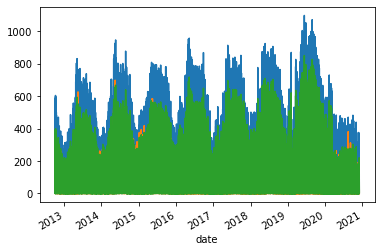

In [151]:
df['total'].plot()
df['este'].plot()
df['oeste'].plot()


Parece que si lo intentamos representar todo junto, la densidad de los datos hace que no veamos nada. Y es que tener datos con tanta variación cada hora, es algo que no parece tener demasiado sentido para representar en un espacio temporal de tanta granularidad como el que tenemos.
Por ello, parece que en este caso lo más lógico será remuestrear nuestros datos a un espectro de más alto nivel, es decir, a unidades de tiempo superiores, por ejemplo, agrupando por mes.

En este caso, a diferencia de los ejemplos vistos en clase, lo que nos interesará será la suma, y no la media, ya que estamos muestreando para saber cuántas bicicletas entre medición y medición (es decir, cuántas bicicletas pasan al mes):

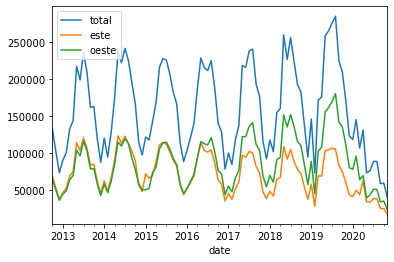

In [169]:
df.resample("M").sum().plot()

Con este gráfico, podemos observar la estacionalidad de los datos, ya que parece que en verano la gente pasea en bicicleta mucho más que en verano.

Otra forma que resulta útil para agregar los datos es usar una media móvil, utilizando la función ``pd.rolling()``.
Utilízala para realizar una media móvil de 30 días de estos datos:

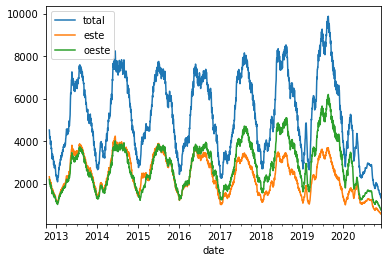

In [168]:
daily = df.resample("D").sum()
daily.rolling(30).mean().plot()

Como habrás podido comprobar, ahora tenemos un registro por día (que nos acumula los datos de los últimos 30 días) mientras que antes teníamos un dato por cada mes. 

Esto da lugar a cierta irregularidad en la gráfica, cosa que podemos "arreglar" variando el corte de la ventana para que no sea tan abrupto.
Podemos obtener una versión más suave de una media móvil usando una función de ventana, por ejemplo, una ventana gaussiana.

Revisa en la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html?highlight=rolling#pandas.Series.rolling) cómo usar el tipo de ventana con la función ``pd.rolling()`` y utiliza una ventana gaussiana con un ancho de ventana de 50 días, con 10 días de ancho de Gauss. Probablemente no sepas cómo introducir el tamaño de 10 días de la ventana de Gauss, pero verás que si haces el sumatorio de los valroes tras haber establecido que quieres usar una ventana de Gauss, el propio Python se te quejará pidiéndote un parámetro en cierta función. Ese parámetro será el que indique este ancho:

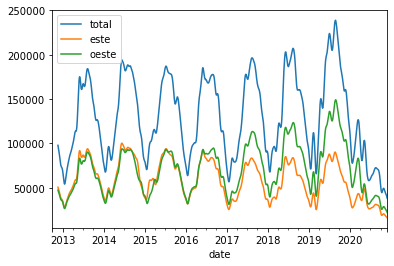

In [175]:
daily.rolling(50, win_type='gaussian').sum(std=10).plot()

### Investigando los datos

Si bien estas vistas de datos suavizadas son útiles para tener una idea de la tendencia general de los datos, ocultan gran parte de la estructura interesante.
Por ejemplo, podríamos querer mirar el tráfico promedio en función de la hora del día.
Podemos hacer esto usando la funcionalidad GroupBy. ¿Cómo lo harías?

Visualízalo también en un gráfico de línea, poniendo en el eje x las horas de 4 en 4 (tendrás que jugar con el parámetro ``xticks``)

El tráfico horario tiene una distribución bimodal como podemos observar, con picos alrededor de las 8:00 de la mañana y las 17:00.
Esta es una prueba probable de una fuerte componente de tráfico de pasajeros que cruza el puente para ir a trabajar por la mañana y de vuelta por la tarde.
Esto se evidencia aún más por las diferencias entre la acera occidental (generalmente utilizada hacia el centro de Seattle), que alcanza su punto máximo por la mañana, y la acera este (generalmente utilizada alejándose del centro de Seattle), que alcanza su punto máximo por la noche.

También podríamos sentir curiosidad por saber cómo cambian las cosas según el día de la semana. Nuevamente, podemos hacer esto con un simple groupby:

Esto muestra una fuerte distinción entre los totales de los días laborables y los fines de semana, con aproximadamente el doble de ciclistas promedio que cruzan el puente de lunes a viernes respecto a los sábados y domingos.